In [2]:
#import required libraries for web scrapping and visualisations

from bs4 import BeautifulSoup
import requests
import random
import pandas as pd
from collections import Counter

In [3]:
#check the data can be retrieved from the page

#using 'query' for the end of the url, this allows us to quickly change it
query = 'Linguistic_diversity_index'

url = 'https://en.wikipedia.org/wiki/Linguistic_diversity_index' + query
response = requests.get(url)
bs_html = BeautifulSoup(response.text, features="html.parser")

#this grabs us the html of the entire page

In [4]:
# preview the html contents
print(bs_html.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-not-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Linguistic diversity indexLinguistic diversity index - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpr

In [5]:
# To avoid getting a 404 error, pass custom headers:
url = 'https://en.wikipedia.org/wiki/Linguistic_diversity_index'
headers = {'Accept': 'text/html'}
response = requests.get(url, headers=headers)
print(response.status_code)

200


In [6]:
#Only find the links on this page
#first create an array for the links

links = []

#Look for all of the <a> anchor tags.
#  with a for loop, using 'try' and 'except.' As some of the anchors may not have an 'href'. we ignore these to avoid an error.

for a in bs_html.find_all("a"):
    try:
        links.append(a["href"])
    except:
        pass


    #then another for loop to cycle though the array and print each link
for link in links:
    print(link)

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Special:SpecialPages
/wiki/Main_Page
/wiki/Special:Search
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
/w/index.php?title=Special:CreateAccount&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/w/index.php?title=Special:UserLogin&returnto=Linguistic+diversity+indexLinguistic+diversity+index
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
/w/index.php?title=Special:CreateAccount&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/w/index.php?title=Special:UserLogin&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/wiki/

In [8]:
#Only find the links on this page
#first create an array for the links

links = []

#Look for all of the <a> anchor tags.
#  with a for loop, using 'try' and 'except.' As some of the anchors may not have an 'href'. we ignore these to avoid an error.

for a in bs_html.find_all("a"):
    try:
        links.append(a["href"])
    except:
        pass


    #then another for loop to cycle though the array and print each link
for link in links:
    print(link)

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Special:SpecialPages
/wiki/Main_Page
/wiki/Special:Search
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
/w/index.php?title=Special:CreateAccount&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/w/index.php?title=Special:UserLogin&returnto=Linguistic+diversity+indexLinguistic+diversity+index
https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en
/w/index.php?title=Special:CreateAccount&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/w/index.php?title=Special:UserLogin&returnto=Linguistic+diversity+indexLinguistic+diversity+index
/wiki/

In [9]:
#Some the links are from outside wikipedia. We only want internal links

# Filter the array to only include links starting with /wiki/, i.e. only internal links will show.

filtered = []

for link in links:
  if link.startswith('/wiki/'):
    filtered.append(link)

for f in filtered:
    print(f)

/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Special:SpecialPages
/wiki/Main_Page
/wiki/Special:Search
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
/wiki/Special:WhatLinksHere/Linguistic_diversity_indexLinguistic_diversity_index
/wiki/Special:SiteMatrix
/wiki/Wikipedia:User_access_levels#Autoconfirmed_users
/wiki/Wikipedia:Article_wizard
/wiki/Wikipedia:Requested_articles
/wiki/Special:WhatLinksHere/Linguistic_diversity_indexLinguistic_diversity_index
/wiki/Special:Purge/Linguistic_diversity_indexLinguistic_diversity_index
/wiki/Case_sensitivity
/wiki/Wikipedia:Redirect
/wiki/Wikipedia:Why_was_the_page_I_created_deleted%3F
/wiki/Wikipedia:About
/wiki/Wikipedia:General_disclaimer


In [10]:
# Use ignore to filter out links to stuff we dont want eg. pictures, help files etc. 

ignores = ['png', 'jpg', 'jpeg', 'isbn', 'svg', 'identifier', \
           'File', 'Special', 'Template', 'Mailto', 'Portal', \
           'Help', 'Category', 'Talk', 'Wikipedia', 'Main_Page']

filtered = []

# line stating only links to wiki pages are valid
for link in links:
    if link.startswith('/wiki/'):
        valid = True

        # line makes all our ignored links invalid
        for ignore in ignores:
            if ignore in link:
                valid = False
                break

        # if the link is valid, we then add it to our 'filtered' array
        if valid:
            filtered.append(link)

for f in filtered:
    print(f)

/wiki/Case_sensitivity


In [18]:
# get the response in html form
wikiurl="https://en.wikipedia.org/wiki/Linguistic_diversity_index"

# check the request was sucsessful (code 200)
response=requests.get(wikiurl)
print(response.status_code)

# parse data from the html into a beautifulsoup object
bs_html = BeautifulSoup(response.text, 'html.parser')

# here we find any element with the table tag, there are some of these we dont want on this page.
# So we specify only tables using the "wikitable" class

tabledata=bs_html.find('table',{'class':"wikitable"})

#read the table data
df=pd.read_html(str(tabledata))

# convert list to pandas dataframe
df=pd.DataFrame(df[0])
print(df.head())

#write the data to a .csv file
df.to_csv('Linguistic_diversity_index.csv', sep=',', encoding='utf-8')

200
   Rank          Country / region    LDI
0     1          Papua New Guinea  0.988
1     2                  Cameroon  0.974
2     3                   Vanuatu  0.973
3     4           Solomon Islands  0.968
4     5  Central African Republic  0.959


/var/folders/zm/2vwt198x30qgsrvf81352qtr0000gn/T/ipykernel_2682/373596869.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(tabledata))


In [19]:
# descriptive statistics of linguistic diversity 
df[["LDI"]].describe() 

,LDI
count,232.000000
mean,0.430108
std,0.297934
min,0.000000
25%,0.162250
50%,0.449000
75%,0.697250
max,0.988000


In [20]:
print(df.head())

   Rank          Country / region    LDI
0     1          Papua New Guinea  0.988
1     2                  Cameroon  0.974
2     3                   Vanuatu  0.973
3     4           Solomon Islands  0.968
4     5  Central African Republic  0.959


In [21]:
import pandas as pd
# resolve issue reading column because of '/' in column header by removing the forward slash


# Load the CSV file
df = pd.read_csv('Linguistic_diversity_index.csv')

# Get the column names
print(df.columns)

# Identify the column with '/' in the name
for col in df.columns:
    if '/' in col:
        new_col_name = col.replace('/', '_')
        df = df.rename(columns={col: new_col_name})
        break

# Save the updated CSV file
df.to_csv('updated_Linguistic_diversity_index.csv', index=False)
print(df.head())



Index(['Unnamed: 0', 'Rank', 'Country / region', 'LDI'], dtype='object')
   Unnamed: 0  Rank          Country _ region    LDI
0           0     1          Papua New Guinea  0.988
1           1     2                  Cameroon  0.974
2           2     3                   Vanuatu  0.973
3           3     4           Solomon Islands  0.968
4           4     5  Central African Republic  0.959


   Unnamed: 0  Rank                  Country _ region    LDI
0           0     1                  Papua New Guinea  0.988
1           1     2                          Cameroon  0.974
2           2     3                           Vanuatu  0.973
3           3     4                   Solomon Islands  0.968
4           4     5          Central African Republic  0.959
5           5     6  Democratic Republic of the Congo  0.948
6           6     7                             Benin  0.933
7           7     8                              Chad  0.933
8           8     9                       South Sudan  0.929
9           9    10                            Uganda  0.929


<Figure size 1000x500 with 0 Axes>

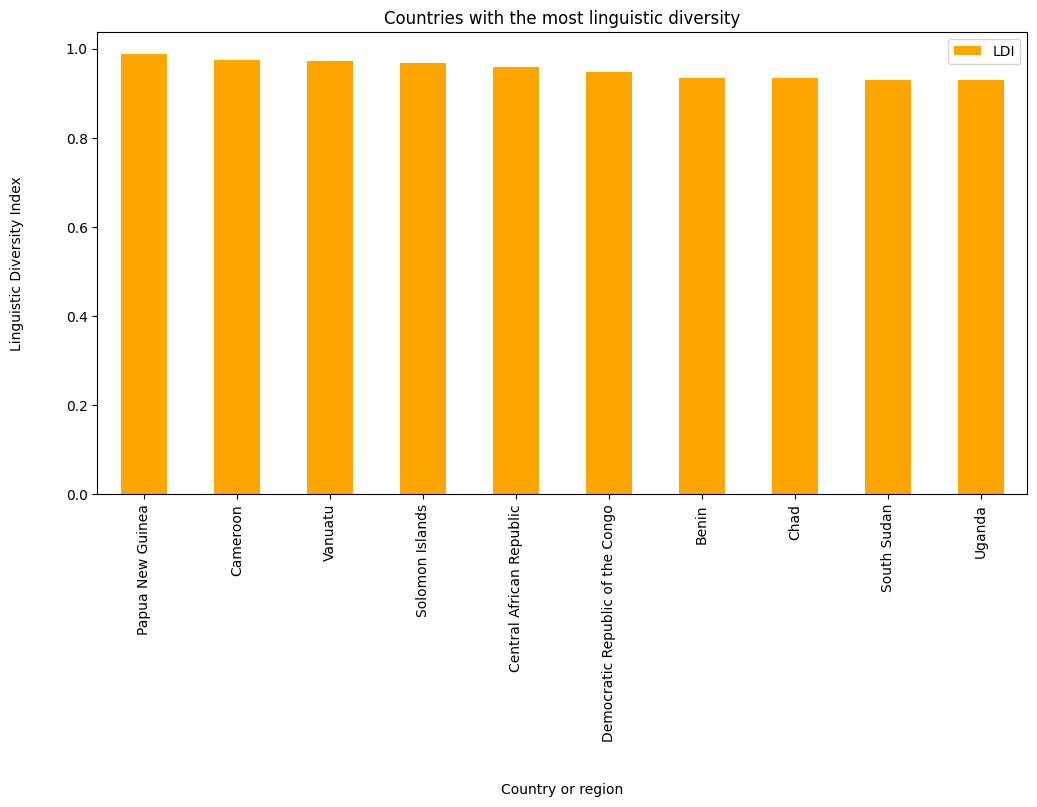

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('updated_Linguistic_diversity_index.csv')

# Sort the DataFrame by 'LDI' in descending order and get the top 10 rows
top_10 = df.sort_values("LDI", ascending=False).head(10)

print (top_10)

# Create the bar graph
plt.figure(figsize=(10, 5))
top_10.plot(kind='bar', x='Country _ region', y="LDI", figsize=(12, 6), color='orange')

# Title and axis labels
plt.title('Countries with the most linguistic diversity')
plt.xlabel('Country or region', labelpad=30)
plt.ylabel('Linguistic Diversity Index', labelpad=30)

# Rotate the x-axis labels 90 degrees so labels don't overlap
plt.xticks(rotation=90)

# Display the graph
plt.show()

     Unnamed: 0  Rank                Country _ region    LDI
231         231   232                     North Korea  0.000
226         226   227                           Haiti  0.000
227         227   228                     Isle of Man  0.000
230         230   231  British Indian Ocean Territory  0.000
229         229   230                    Vatican City  0.000
228         228   229                      San Marino  0.000
225         225   226                            Cuba  0.001
224         224   225                     El Salvador  0.003
222         222   223                        Guernsey  0.007
221         221   222                         Burundi  0.007


<Figure size 1000x500 with 0 Axes>

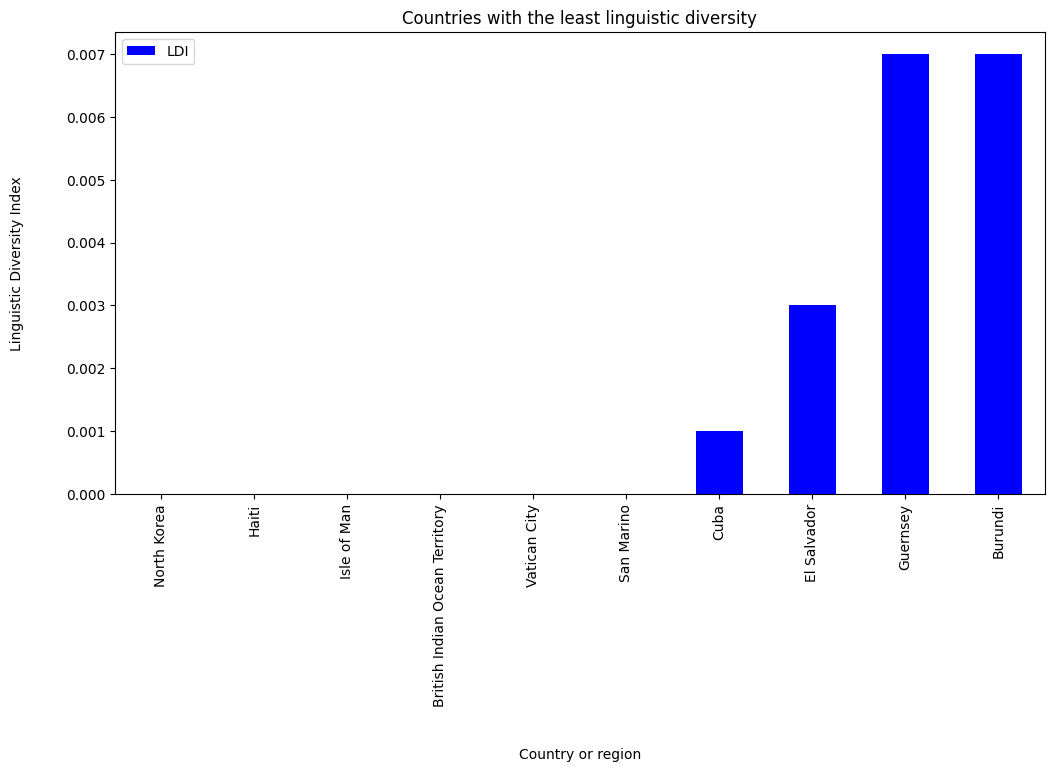

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('updated_Linguistic_diversity_index.csv')

# Sort the DataFrame by 'LDI' in descending order and get the top 10 rows
bottom_10 = df.sort_values('LDI', ascending=True).head(10)
print (bottom_10)

# Create the bar graph
plt.figure(figsize=(10, 5))
bottom_10.plot(kind='bar', x='Country _ region', y='LDI', figsize=(12, 6), color='blue')


# Title and axis labels
plt.title('Countries with the least linguistic diversity')
plt.xlabel('Country or region', labelpad=30)
plt.ylabel('Linguistic Diversity Index', labelpad=30)

# Rotate the x-axis labels 90 degrees so labels don't overlap
plt.xticks(rotation=90)

# Display the graph
plt.show()